# Name: Ian Ruvuto Kampwanyi

## Discretization of the wave equation

#### -In this project we will observe the motion of different strings using the algorithm leapfrog to predict u(x,t) where u is given as the position of each point on the string
#### -Before we begin with the algorithm, below is the equation to be used to calculate the future u(x,t)

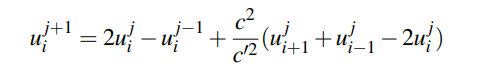
##### -In the image i is the index of a point in the string and j represent the state where: j present state, j-1 previous state.

#### -Below are the imports to be needed for the algorithm and animation

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import math

### -Now we create variables that will serve as parameters for the algorithm

In [2]:
#getting the length of the string
length = 1

#parameters of the calculation
c = 1
c_der = 1
h = 1
delt_T = 1

#subdivide intervals
grid_space = 100
t = np.linspace(0, length, grid_space)
size = len(t)
print("the size is ", size)

the size is  100


### -As described above the leapfrog algorithm needs 3 states ( j, j-1, j+1 )
#### The list below variable named arr will hold a list of lists where i = point on the string and arr[ i ][ 0 ] = j, arr[ i ][ 1 ] = j-1 and arr[ i ][ 2 ] = j+1

In [3]:
global arr
arr = [[0,0,0]]

#### -Now that we have initialised the array we create a function to initialise the array depening on the gridspace

In [4]:
def initialiser(l):
    put = 0
    for i in range(l):
        if(i == 0):
            continue
        else:
            arr.append([0,0,0])
        put = (-200)*(pow((t[i]-0.5),2))
        put = pow(math.e,put)
        arr[i] = [put,put,put]
            #print("pos ",i, " has ", put)

#### -To model the the wave motion we implement the leapfrog algorithm from above. 
##### -Note: The function Update is to be called once the leapfrog algorithm has been done for every point on the string.
##### -The function update simply re-initialise the present and past state of the points of the strings after leapfrog algroithm.

In [5]:
def leapfrog(pos, l):

    first = ((2*arr[pos][0])-(arr[pos][1]))
    #print("the pos ", pos, " size ",l)
    sec = (c/c_der)*((arr[pos+1][0]) + (arr[pos-1][0]) - (2*(arr[pos][0])))
    arr[pos][2] = first + sec


#now we have to updates the state of the position

def update(l):
    for pos in range(l):
        arr[pos][1] =  arr[pos][0]
        arr[pos][0] = arr[pos][2]

### -To display the effect of the effect of the leapfrog algorithm we need to define a few function
#### -graph_point)=(l) => is a function that simply returns a lists containing the new points of the string
#### -init_func() => is a function that clears the plot in order to plot the new frame (in terms of animation)
#### -update_plot() => is a function that updates the new point after the leapfrog algorithm

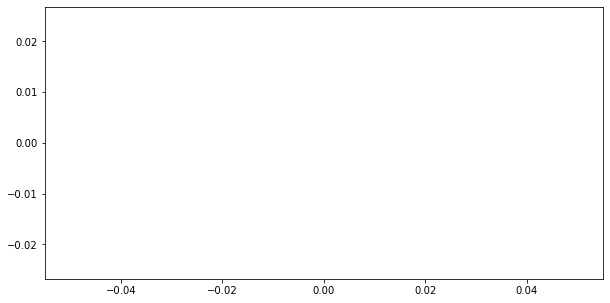

In [6]:
def graph_point(l):
    pty = [0]
    for i in range(l):
        if (i == 0):
            pty[i] = (arr[i][0])
        else:
            pty.append((arr[i][0]))

    return pty


#Display the figure
grid = plt.figure()
grid.set_figheight(5)
grid.set_figwidth(10)
plt.axis("equal")

initialiser(size)
ptyy = graph_point(size) ###The starting point of the string


def init_func():
    plt.clf()

def update_plot(i):
    plt.clf()
    for i in range(size):
        if (i == 0) or (i == size-1):
            pass
        else:
            leapfrog(i, size)   
    pty = graph_point(size)
    update(size)
    plt.plot(t, pty, 'k')
    plt.ylim([5,-5])
    plt.xlim([0,length])
    
anim = FuncAnimation(grid, update_plot, frames=np.linspace(1, 1000, 1000), init_func= init_func, interval=30)
#anim.save('an.gif', writer='Pillow', fps=20)

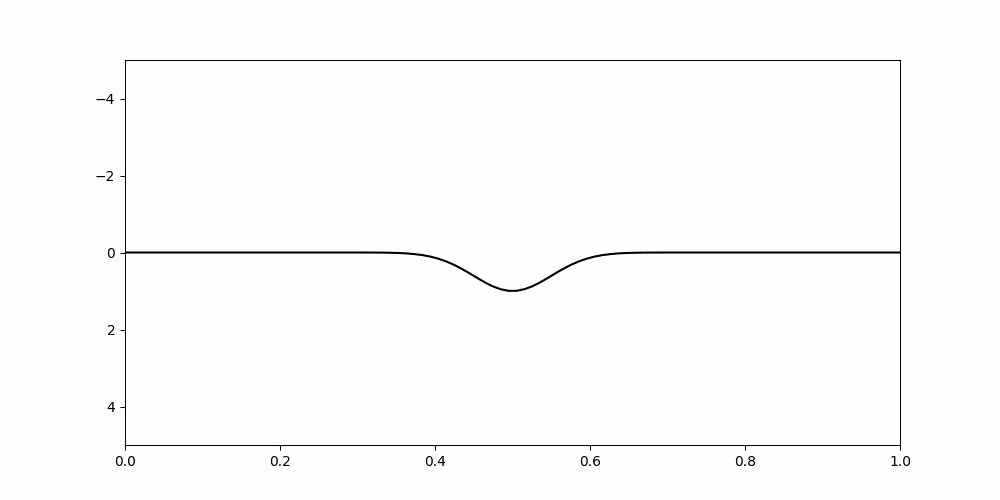

#### -Let's increase the grid-space and observe the difference

In [7]:
arr.clear()
arr = [[0,0,0]]
grid_space = 200
t = np.linspace(0, length, grid_space)
l_space = length/grid_space
size = len(t)
initialiser(size)
ptyy = graph_point(size) ###The starting point of the string
print("the size is ", size)
anim2 = FuncAnimation(grid, update_plot, frames=400, init_func= init_func, interval=30)
#anim2.save('an1.gif', writer='Pillow', fps=20)

the size is  200


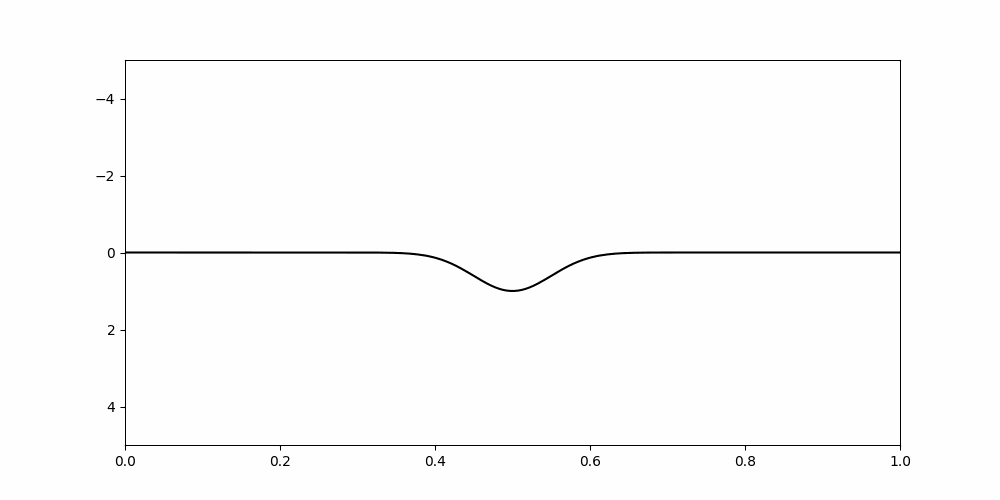
###### -This animation is found in animation2.py

#### -From above by increasing the grid-space we increase the number of points to be passed through the leapfrog algorithm and this requires more computer power thus making the animation slower.

### -Let's try a new observation with a decreased grid-space

In [8]:
arr.clear()
arr = [[0,0,0]]
grid_space = 50
t = np.linspace(0, length, grid_space)
l_space = length/grid_space
size = len(t)
initialiser(size)
ptyy = graph_point(size) ###The starting point of the string
print("the size is ", size)
anim2 = FuncAnimation(grid, update_plot, frames=400, init_func= init_func, interval=30)
#anim3.save('an1.gif', writer='Pillow', fps=20)

the size is  50


C:\Users\kampw\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


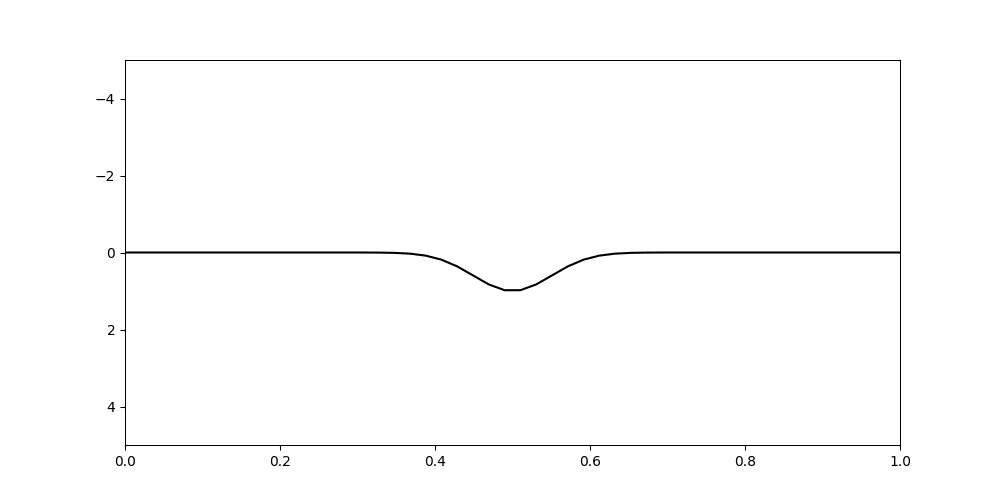
##### -The above animation is found in animation3.py

#### -From above by decreasing the grid-space we decrease the number of points to be passed through the leapfrog algorithm and this requires less computer power thus making the animation faster.

#### -In continuation, we can now change the previous parameters such that When a string is plucked near its end, a pulse reflects off the ends and bounces back and forth.
##### -In this case I suggest we change the parameter such that the strings oscillation begins from the origin

In [9]:
def initialiser2(l):
    put = 0
    for i in range(l):
        if(i == 0):
            continue
        else:
            arr.append([0,0,0])
        put = (-200)*(pow((t[i]),2)) ##change
        put = pow(math.e,put)
        arr[i] = [put,put,put]

In [10]:
anim = FuncAnimation(grid, update_plot, frames=400, init_func= init_func, interval=30)
#anim.save('an4.gif', writer='Pillow', fps=20)

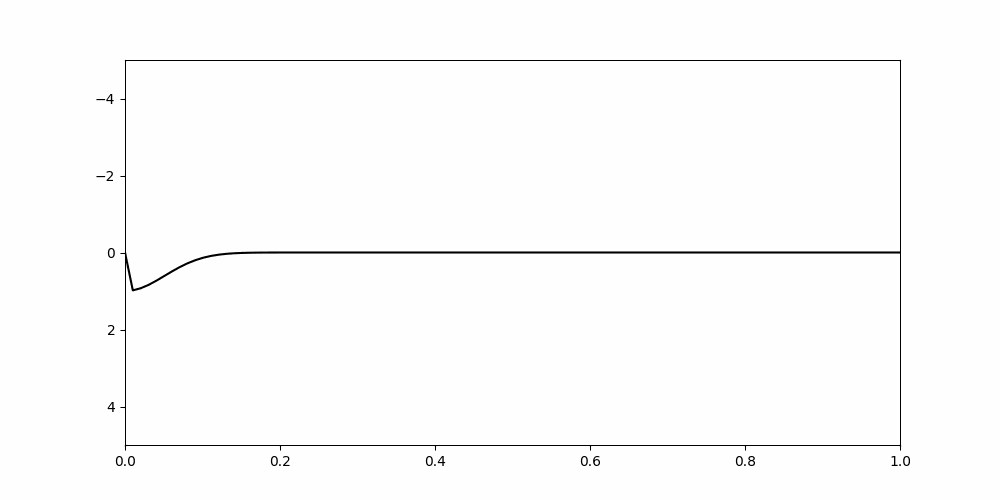

#### -The above animation illustrates a pulse being reflected back and forth.